## Logistic Regression Workshop

### import the Libraries

In [238]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Load the dataset

In [239]:
data = pd.read_csv("iris-data-clean.csv")
print("Before replacement: \n", data.head())

replacements ={
'Setosa': 0,
'Virginica' : 1,
'Versicolor':2
}
data['class']=data['class'].replace(replacements)

print("After replacement: \n",data.head())

data.describe()

Before replacement: 
    sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm   class
0              5.1             3.5              1.4             0.2  Setosa
1              4.9             3.0              1.4             0.2  Setosa
2              4.7             3.2              1.3             0.2  Setosa
3              4.6             3.1              1.5             0.2  Setosa
4              5.0             3.6              1.4             0.2  Setosa
After replacement: 
    sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  class
0              5.1             3.5              1.4             0.2      0
1              4.9             3.0              1.4             0.2      0
2              4.7             3.2              1.3             0.2      0
3              4.6             3.1              1.5             0.2      0
4              5.0             3.6              1.4             0.2      0


/tmp/ipykernel_25308/2009504371.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['class']=data['class'].replace(replacements)


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.875862,3.048966,3.835862,1.234483,1.034483
std,0.820931,0.437975,1.743905,0.750868,0.811495
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.400000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### define the datas -- x and y

In [240]:
x=data[['sepal_length_cm',  'sepal_width_cm', 'petal_length_cm',  'petal_width_cm']]  # features
y=data['class']  # target

### split dataset - Train and Test

In [241]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

### create Logisitics Regression Model

In [242]:
model=LogisticRegression(solver='lbfgs', random_state=42)   # if there are more than 2 classes
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Predict

In [243]:
y_pred=model.predict(x_test)
print("Predictions: \n", y_pred)

#test to predict the outcomes

print("Test: \n",model.predict([[5.1, 3.0, 1.8, 0.2]]))

Predictions: 
 [2 1 0 0 0 1 1 1 2 0 0 2 1 1 2 0 1 1 1 2 2 1 0 2 0 2 2 2 1]
Test: 
 [0]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Evaluate

In [244]:
accuracy_score1=accuracy_score(y_test,y_pred)
confusion_matrix1=confusion_matrix(y_test, y_pred)

print(f"accuracy_score for 4 features: \n {accuracy_score1*100:.5f}%")
print("confusion_matrix for 4 features: \n", confusion_matrix1)

accuracy_score for 4 features: 
 93.10345%
confusion_matrix for 4 features: 
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  1  9]]


### Visual data

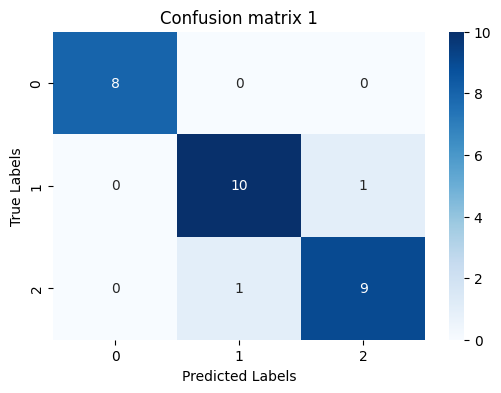

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix1, annot =True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion matrix 1")
plt.show()

### Model with Two features only

     sepal_width_cm  petal_width_cm
0               3.5             0.2
1               3.0             0.2
2               3.2             0.2
3               3.1             0.2
4               3.6             0.2
..              ...             ...
140             3.0             2.3
141             2.5             1.9
142             3.0             2.0
143             3.4             2.3
144             3.0             1.8

[145 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
140    1
141    1
142    1
143    1
144    1
Name: class, Length: 145, dtype: int64
Predictions: 
 [2 1 0 0 0 1 1 1 2 0 0 2 2 2 2 2 1 1 1 1 2 1 0 2 0 2 2 2 1]
accuracy_score for 2 features: 
 93.10345%
confusion_matrix for 2 features: 
 [[ 7  0  1]
 [ 0 10  1]
 [ 0  0 10]]


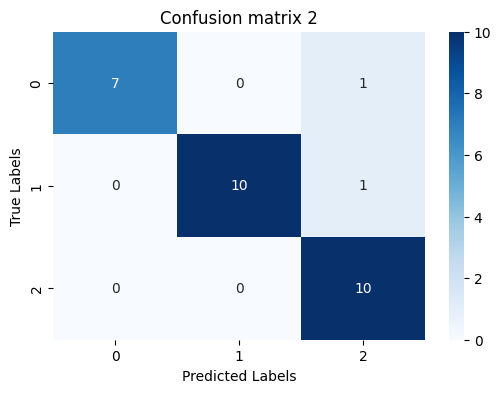

In [246]:
from sklearn.metrics import accuracy_score

x1=data[['sepal_width_cm', 'petal_width_cm']]  # taken random 2 features
y1=data['class']  # target

print(x1)
print(y1)

#split the dataset
x1_train, x1_test, y1_train, y1_test=train_test_split(x1,y1,test_size=0.2, random_state=42)

# LogisticReg Model
model1=LogisticRegression(solver='lbfgs', random_state=42)   # if there are more than 2 classes
model1.fit(x1_train,y1_train)

#prediction
y1_pred=model1.predict(x1_test)
print("Predictions: \n", y1_pred)

#Evaluate
accuracy_score2=accuracy_score(y1_test,y1_pred)
confusion_matrix2=confusion_matrix(y1_test, y1_pred)

print(f"accuracy_score for 2 features: \n {accuracy_score2*100:.5f}%")
print("confusion_matrix for 2 features: \n", confusion_matrix2)
#Visual data

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix2, annot =True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion matrix 2")
plt.show()